# Análise dos Dados da Copa do Mundo
Com base na página sobre a Copa do Mundo na Wikipedia em PT-BR, vamos obter os dados sobre Público Pagante de todas as finais da Copa do Mundo da FIFA.

Link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

Existem bibliotecas específicas para auxiliar a raspagem de dados, mas o próprio pandas conseguem obter dados de sites, desde que os dados estejam em tabelas.

In [1]:
# Importando as bibliotecas
import requests
import pandas as pd

# Site onde estão os dados
url = "https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA"

# Requisicao para obter os dados
r = requests.get(url)

# Obtém os dados do HTML da página
tabelas = pd.read_html(r.text)

# Vamos dar uma olhada nos dados retornados
# A variável tabelas contém todas as tabelas do site, já recuperadas pelo pandas
tabelas

[                                                    0  \
 0                                  Copa do Mundo FIFA   
 1                                                 NaN   
 2                                        Dados gerais   
 3                                         Organização   
 4                                             Edições   
 5                                    Local de disputa   
 6                                             Sistema   
 7   Dados históricos  Primeiro vencedor  Uruguai (...   
 8                                    Dados históricos   
 9                                   Primeiro vencedor   
 10                                    Último vencedor   
 11  Estatísticas  Total de gol(o)s 2 548  Total de...   
 12                                       Estatísticas   
 13                                   Total de gol(o)s   
 14                                     Total de jogos   
 15                                              Média   
 16           

In [2]:
# Queremos a tabela com os dados de Público Pagante das Finais da Copa do Mundo
# Essa é a 12° tabela dos dados de retorno

# Então vamos criar um DataFrame com os dados dessa tabela
# lembrando que começamos a contar de 0 
df = tabelas[11]

df.head()

,0,1,2,3,4
0,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850


In [3]:
# Vamos ajustar o DataFrame usando a linha 0 como título das colunas

# Alterando o título das colunas
df.columns = df.iloc[0]

# Excluindo a linha 0
# O parâmetro inplace=True força que a operação seja realizada no próprio DataFrame
df.drop(df.index[0], inplace=True)

df.head()

,Edição,Ano,Estádio,Local,Público pagante
1,I,1930,Estádio Centenário,Montevidéu,68.346
2,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
3,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
5,V,1954,Estádio Wankdorf,Berna,62.500


In [4]:
# Vamos verificar os tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [5]:
# Qual o maior público pagante?
df['Público pagante'].max()

'96.924'

In [6]:
# Precisamos converter a coluna 'Público pagante' para int
# Mas a conversão não vai ser possível diretamente por conta do '.'
# Então vamos substituir o '.' por nada, e depois converter a coluna para int
# str converte o conteúdo da célula para string (texto)
# replace substitui o '.' por uma string vazia
# astype converte o conteúdo da célula para o tipo especificado, no caso o tipo inteiro
df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

# Verificando novamente os tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null int32
dtypes: int32(1), object(4)
memory usage: 924.0+ bytes


In [7]:
# Verificando a final da Copa com maior público até hoje
df[df['Público pagante'] == df['Público pagante'].max()]

,Edição,Ano,Estádio,Local,Público pagante
4,IV,1950,Estádio do Maracanã,Rio de Janeiro,173850


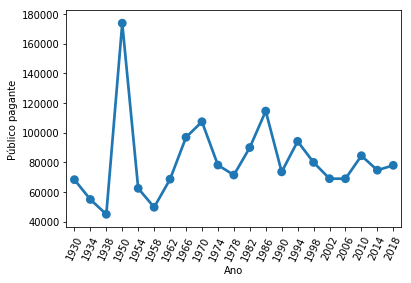

In [8]:
# Agora vamos fazer um gráfico mostrando a evolução do Público pagante
# nas finais da Copa do Mundo, usando os dados do DataFrame

# Importando a biblioteca
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Exibindo um gráfico de linhas com marcação em cada ponto
sns.pointplot(x='Ano', y='Público pagante', data=df)

# Ajustando legenda dos anos 
plt.xticks(rotation=65)
plt.show()